In [1]:
import glob
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
import numpy as np
import os
import pandas as pd
import sys
from IPython.display import display

basedir = os.path.join('Y:\\', 'Dissertation')
datadir = "data"
modeldir = 'models'
evaldir = 'evals'
scoredir = 'scores'

codepath = os.path.join(basedir, 'workspace', 'word2manylanguages', 'python')
sys.path.append(codepath)
import word2manylanguages as wm

dimensions = ["500", "300", "200", "100", "50"]
windows = ["1", "2", "3","4", "5", "6"]
languages = ['ar', 'bg', 'de', 'el', 'en', 'es', 'fi', 'fr', 'is', 'it', 'ja', 'nl', 'no', 'pl', 'pt', 'ru', 'sr', 'tr', 'zh']

In [2]:
scorepath = os.path.join(basedir, scoredir)
if not os.path.exists(scorepath):
    os.makedirs(scorepath)

In [3]:
def score(language):
    rows = []
    base_file_name = f'{language}_eval.csv'
    outfilename = f'{language}_scores.csv'
    print("Loading eval " + base_file_name) 
    path = os.path.join(basedir, evaldir, base_file_name)
    eval = pd.read_csv(path)

    for index, stuff in eval.iterrows():
        row = dict()
        model = stuff['source']
        parts = model.split('_')
    
        row['Language'] = language
        row['Dimensions'] = parts[1]
        row['Window'] = parts[2]
        row['Algorithm'] = parts[3]
        row['Norm'] = stuff['norm']
        row['Score'] = stuff['adjusted r-squared']
        rows.append(row)

    dataframe = pd.DataFrame(rows)   

    dataframe.sort_values(by=['Score',"Dimensions","Window"], ascending=[False, True, True], inplace=True)

    print(dataframe)

    outfile = os.path.join(scorepath,outfilename)
    dataframe.to_csv(outfile)

In [4]:


for language in languages:
    score(language)

Loading eval ar_eval.csv
    Language Dimensions Window Algorithm           Norm     Score
123       ar        200      1      cbow      imagine_M  0.149591
128       ar        200      1        sg      imagine_M  0.140570
3         ar         50      1      cbow      imagine_M  0.140530
63        ar        100      1      cbow      imagine_M  0.139940
73        ar        100      2      cbow      imagine_M  0.137606
..       ...        ...    ...       ...            ...       ...
116       ar        100      6        sg  image_agree_M -0.061250
81        ar        100      3      cbow  image_agree_M -0.061758
106       ar        100      5        sg  image_agree_M -0.063301
101       ar        100      5      cbow  image_agree_M -0.071901
51        ar         50      6      cbow  image_agree_M -0.078709

[300 rows x 6 columns]
Loading eval bg_eval.csv
    Language Dimensions Window Algorithm                         Norm  \
278       bg        300      2        sg                 comp

    Language Dimensions Window Algorithm       Norm     Score
306       pl        500      2        sg  valence_M  0.570914
234       pl        300      2        sg  valence_M  0.563898
162       pl        200      2        sg  valence_M  0.559717
294       pl        500      1        sg  valence_M  0.556422
330       pl        500      4        sg  valence_M  0.553316
..       ...        ...    ...       ...        ...       ...
39        pl         50      4      cbow   origin_M -0.007705
61        pl         50      6      cbow  arousal_M -0.009465
15        pl         50      2      cbow   origin_M -0.012819
37        pl         50      4      cbow  arousal_M -0.013066
171       pl        200      3      cbow   origin_M -0.017715

[900 rows x 6 columns]
Loading eval pt_eval.csv
    Language Dimensions Window Algorithm        Norm     Score
275       pt         50      2        sg  concrete_M  0.789959
671       pt        300      2        sg  concrete_M  0.789790
297       pt      

In [5]:
def max_per_norm(language):
    base_file_name = f'{language}_scores.csv'
    print("Loading scores " + base_file_name) 
    path = os.path.join(basedir, scoredir, base_file_name)
    scores = pd.read_csv(path)

    maxes = dict()
    
    for index, stuff in scores.iterrows():
        score = stuff['Score']
        norm = stuff['Norm']
        
        if norm in maxes:
            curmax = maxes[norm]
            if stuff['Score'] > curmax['Score']:
                maxes[norm] = stuff[['Language','Dimensions','Window','Algorithm','Norm','Score']]            
        else:
            maxes[norm] = stuff[['Language','Dimensions','Window','Algorithm','Norm','Score']]       

    dataframe = pd.DataFrame(maxes.values())   

    dataframe.sort_values(by=['Score',"Dimensions","Window"], ascending=[False, True, True], inplace=True)

    print(dataframe)

In [6]:
for language in languages:
    max_per_norm(language)

Loading scores ar_scores.csv
    Language  Dimensions  Window Algorithm              Norm     Score
0         ar         200       1      cbow         imagine_M  0.149591
40        ar         200       1      cbow             aoa_M  0.090917
97        ar         100       4      cbow        familiar_M  0.046519
135       ar          50       1        sg  visual_complex_M  0.021232
199       ar         200       5        sg     image_agree_M -0.005079
Loading scores bg_scores.csv
    Language  Dimensions  Window Algorithm  \
0         bg         300       2        sg   
26        bg         300       3        sg   
74        bg         500       6      cbow   
78        bg         200       1      cbow   
93        bg         500       6        sg   
109       bg         500       6        sg   
122       bg         500       6        sg   

                                      Norm     Score  
0                             complexity_M  0.521060  
26                              famil

     Language  Dimensions  Window Algorithm  \
0          fr         500       4        sg   
30         fr         100       2        sg   
88         fr         200       3        sg   
132        fr         100       5        sg   
170        fr         500       3        sg   
196        fr         500       4        sg   
268        fr         100       2        sg   
299        fr         300       1        sg   
313        fr         100       2        sg   
373        fr         300       3        sg   
406        fr         100       4        sg   
419        fr         500       3        sg   
536        fr         300       3        sg   
614        fr         300       3        sg   
735        fr         300       6        sg   
752        fr         300       4        sg   
776        fr         200       3        sg   
783        fr         300       4        sg   
888        fr         500       6        sg   
903        fr         100       2        sg   
914        fr

    Language  Dimensions  Window Algorithm  \
0         no         200       5        sg   
20        no         300       5        sg   
81        no         500       1      cbow   
84        no         500       1      cbow   
184       no         500       1      cbow   
187       no          50       1        sg   
191       no         100       1      cbow   

                                      Norm     Score  
0                             complexity_M  0.504115  
20                              familiar_M  0.399187  
81   meaninterkeypressintervalcommonname_M  0.265503  
84             meaninterkeypressinterval_M  0.247070  
184            responselatencycommonname_M  0.101595  
187                           matchimage_M  0.094435  
191                      responselatency_M  0.092108  
Loading scores pl_scores.csv
    Language  Dimensions  Window Algorithm             Norm     Score
0         pl         500       2        sg        valence_M  0.570914
24        pl         2

In [7]:
path = os.path.join(basedir, scoredir)
files = glob.glob(path + "\\*_scores.csv")
retval = list()

for file in files:
    df = pd.read_csv(file, header=0)
    print("Loading scores " + file) 
    scores = pd.read_csv(file, header=0)
    
    # Get best cbow
    scores.sort_values(by=['Algorithm','Score',"Dimensions","Window"], ascending=[True,False, True, True], inplace=True)
    count = 0;
    for index, stuff in scores.iterrows():
        retval.append(stuff[['Language','Dimensions','Window','Algorithm','Norm','Score']])
        count+=1
        if count>=3:break
            
    # Get best sg
    scores.sort_values(by=['Algorithm','Score',"Dimensions","Window"], ascending=[False,False, True, True], inplace=True)
    count = 0;
    for index, stuff in scores.iterrows():
        retval.append(stuff[['Language','Dimensions','Window','Algorithm','Norm','Score']])
        count+=1
        if count>=3:break

dataframe = pd.DataFrame(retval)  
print(dataframe)
outfile = os.path.join(path,"top_3_per_algo.csv")
dataframe.to_csv(outfile)

Loading scores Y:\Dissertation\scores\ar_scores.csv
Loading scores Y:\Dissertation\scores\bg_scores.csv
Loading scores Y:\Dissertation\scores\de_scores.csv
Loading scores Y:\Dissertation\scores\el_scores.csv
Loading scores Y:\Dissertation\scores\en_scores.csv
Loading scores Y:\Dissertation\scores\es_scores.csv
Loading scores Y:\Dissertation\scores\fi_scores.csv
Loading scores Y:\Dissertation\scores\fr_scores.csv
Loading scores Y:\Dissertation\scores\is_scores.csv
Loading scores Y:\Dissertation\scores\it_scores.csv
Loading scores Y:\Dissertation\scores\ja_scores.csv
Loading scores Y:\Dissertation\scores\nl_scores.csv
Loading scores Y:\Dissertation\scores\no_scores.csv
Loading scores Y:\Dissertation\scores\pl_scores.csv
Loading scores Y:\Dissertation\scores\pt_scores.csv
Loading scores Y:\Dissertation\scores\ru_scores.csv
Loading scores Y:\Dissertation\scores\sr_scores.csv
Loading scores Y:\Dissertation\scores\tr_scores.csv
Loading scores Y:\Dissertation\scores\zh_scores.csv
    Language

In [8]:
# Make heatmaps by algo
file = os.path.join(scorepath,"top_3_per_algo.csv")
df = pd.read_csv(file, header=0)

In [9]:
df_cbow = df.loc[df['Algorithm'] == 'cbow']

# Grind up the values for cbow
counts = np.zeros((len(dimensions), len(windows)), dtype=np.int8)
labels = list()
for i in range(len(dimensions)):
    row = list()
    for j in range(len(windows)):
        row.append(set())
    labels.append(row)

for i in range(len(df_cbow)):
    r = dimensions.index(str(df_cbow.iloc[i]['Dimensions']))
    c = windows.index(str(df_cbow.iloc[i]['Window']))
    counts[r][c] += 1
    labels[r][c].add(df_cbow.iloc[i]["Language"])
    
for i in range(len(labels)):
    for j in range(len(labels[i])):
        # Put returns in place of every fifth space.
        labelset = list(labels[i][j])
        label = ""
        c = 0;
        if labelset != None:
            for k in range(len(labelset)):
                label += labelset[k]
                c += 1
                if c == 5:
                    label += '\n'
                    c = 0
                else:
                    label += ' '
        labels[i][j] = label.strip()

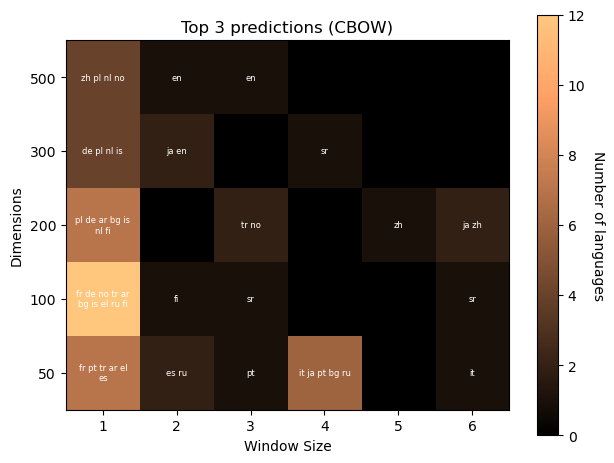

In [10]:
# Make the heatmap

fig, ax = plt.subplots()
im = ax.imshow(counts, cmap="copper")

# Create colorbar
cbar_kw = {}
cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
cbar.ax.set_ylabel("Number of languages", rotation=-90, va="bottom")

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(windows)), labels=windows)
ax.set_yticks(np.arange(len(dimensions)), labels=dimensions)


# Loop over data dimensions and create text annotations.
for i in range(len(dimensions)):
    for j in range(len(windows)):
        text = ax.text(j, i, labels[i][j],
                       ha="center", va="center", color="w", size=6)

ax.set_title("Top 3 predictions (CBOW)")
ax.set_ylabel("Dimensions", rotation=90, va="bottom")
ax.set_xlabel("Window Size")
fig.tight_layout()
plt.show()


In [11]:
df_sg = df.loc[df['Algorithm'] == 'sg']

# Grind up the values for wiki sg
counts = np.zeros((len(dimensions), len(windows)), dtype=np.int8)
labels = list()
for i in range(len(dimensions)):
    row = list()
    for j in range(len(windows)):
        row.append(set())
    labels.append(row)

for i in range(len(df_sg)):
    r = dimensions.index(str(df_sg.iloc[i]['Dimensions']))
    c = windows.index(str(df_sg.iloc[i]['Window']))
    counts[r][c] += 1
    labels[r][c].add(df_sg.iloc[i]["Language"])
    
for i in range(len(labels)):
    for j in range(len(labels[i])):
        # Put returns in place of every fifth space.
        labelset = list(labels[i][j])
        label = ""
        c = 0;
        if labelset != None:
            for k in range(len(labelset)):
                label += labelset[k]
                c += 1
                if c == 5:
                    label += '\n'
                    c = 0
                else:
                    label += ' '
        labels[i][j] = label.strip()

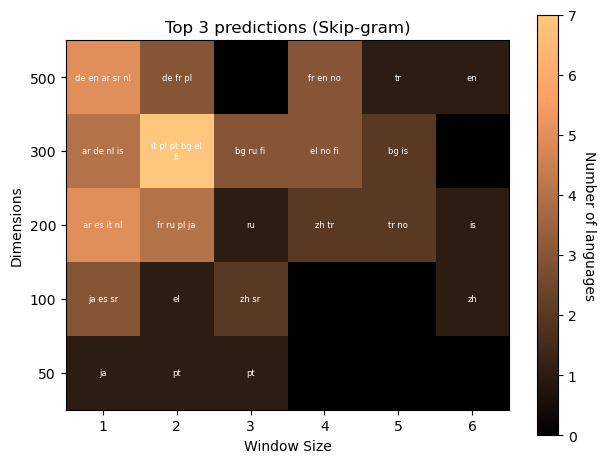

In [12]:
# Make the heatmap

fig, ax = plt.subplots()
im = ax.imshow(counts, cmap="copper")

# Create colorbar
cbar_kw = {}
cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
cbar.ax.set_ylabel("Number of languages", rotation=-90, va="bottom")

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(windows)), labels=windows)
ax.set_yticks(np.arange(len(dimensions)), labels=dimensions)


# Loop over data dimensions and create text annotations.
for i in range(len(dimensions)):
    for j in range(len(windows)):
        text = ax.text(j, i, labels[i][j],
                       ha="center", va="center", color="w", size=6)

ax.set_title("Top 3 predictions (Skip-gram)")
ax.set_ylabel("Dimensions", rotation=90, va="bottom")
ax.set_xlabel("Window Size")
fig.tight_layout()
plt.show()